<h1><center>Geely Auto Assignment</center></h1>

<div style="text-align: right"> Submitted By:
<br>Ravi Dhir</div>

## Contents

* [1. Introduction](#1)
 * [1.1 About the Company](#1.1)
 * [1.2 Business Objective](#1.2)
* [2. Import the Data](#2)
 * [2.1 Import Required Libraries](#2.1)
  * [2.2 Import & Clean Data](#2.2)
    * [2.2.1 Creating and  Loading Data Frame](#2.2.1)
    * [2.2.2 Cleaning the columns - Stripping Spaces, Matching Lowercare](#2.2.2)
    * [2.2.3 Creating an Index Column](#2.2.3)
    * [2.2.4 Creating Company Name Columns](#2.2.4)
    * [ 2.2.4 Dealing with Data Types](#2.2.5)
        * [2.2.5.1 Symboling variable](#2.2.5.1)
* [3. Data Analysis](#3)
 * [3.1 Variables Correlation Analysis](#3.1)
 * [3.2 Categorical Variables Analysis](#3.2)
 * [3.3 Removing Outliers](#3.3)
 * [3.4 Dealing with Multicolinearity](#3.4)
* [4. Data Prepration for Linear Regression](#4)
 * [4.1 Dealing with Binary Variables](#4.1)
 * [4.2 Creating Dummy Variables](#4.2)
 * [4.3 Splitting into Test and Train Dataset](#4.3)
 * [4.4 Feature Scaling of Data](#4.4)
 * [4.5 Divide into X and Y Sets for Building Model](#4.5)
* [5. Building the Linear Regression Model](#5) 
 * [5.1 Building model using statsmodel, for the detailed statistics](#5.1)
 * [5.2 Resiual analysis on train dataset](#5.2)
 * [5.3 Making Predictions](#5.3)
 * [5.4 Model Evaluation](#5.4)
  * [5.4.1 R2_Score](#5.4.1)
* [6. Inferences](#6)

<a id="1"></a>
## 1. Introduction

<a id="1.1"></a>
**About the Company:** [Geely Auto](http://geelyauto.com.hk/en/) is a Chinese Automobile company that aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

<a id="1.2"></a>
**Business Objective:** The company wants to understand the __factors__ on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. It wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

<br/>

**We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.**

<a id="2"></a>
## 2. Import  Data - Lock and Load!

In this section, we will clean and load the Data in a master DataFrame to analyse further.

<a id="2.1"></a>
### 2.1 Import Required Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Librariries for Data Analysis
import numpy as np
import pandas as pd
import datetime
from math import sqrt

In [3]:
#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Libraries for Fuzzy Lookup
from fuzzywuzzy import fuzz
# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
#Libraries for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# Set Parameters for Displaying data
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.max_rows=250

<a id="2.2"></a>
### 2.2 Import & Clean Data


<a id="2.2.1"></a>
#### 2.2.1 Creating and  Loading Data Frame


In [7]:
carprice= pd.read_csv("CarPrice_Assignment.csv")
carprice.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"


In [8]:
carprice.shape

(205, 26)

In [9]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

> **Observation:** Our DataFrame is ~42KB , contains __26 Columns__ and __205 Rows__ and there are __No Missing (NaN) values.__

<a id="2.2.2"></a>
#### 2.2.2 Cleaning the columns - Stripping Spaces, Matching Lowercare


In [10]:
# Stripping all the columns, so there are no leading or trailing white space
carprice=carprice.apply(lambda x: x.str.strip()if x.dtype == "object" else x)

In [11]:
# Convert Data to lower
carprice=carprice.apply(lambda x: x.str.lower()if x.dtype == "object" else x)

In [12]:
carprice.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"


<a id="2.2.3"></a>
#### 2.2.3 Creating an Index Column

In [13]:
carprice.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

> **Observation:** Car_ID column is the perfect chioce fro key column.

In [14]:
carprice.set_index('car_ID',inplace=True)

In [15]:
carprice.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"


<a id="2.2.4"></a>
#### 2.2.4 Creating Company Name Columns

* There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building.


In [16]:
carprice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu-x', 'isuzu d-max',
       'isuzu d-max v-cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4

Let's extract the first word from the list and have  look at unique values

In [17]:
#Extracting the first word from the column and analysing the values
carprice.CarName.str.split().str.get(0).unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

>**Observation:** We notice that a lot of companies are misspelt. Ex: porche and porchse.

Let's use Python's __fuzzywuzzy__ library to correct the values

In [18]:
# Create a Master list having correct values
master_companyname= ['alfa-romero','audi','bmw','chevrolet','dodge','honda','isuzu','jaguar'
                      ,'mazda','buick','mercury','mitsubishi','nissan','peugeot','plymouth'
                      ,'porsche','renault','saab','subaru','toyota','volkswagen','volvo']

In [19]:
#Create a function to extract and correct the names of company
def correct_companyname(companyname):
    # new_name - corrected name , score - fuzzy score
    # We will now pass the values from dataset and compare it with master value list to get correct result
    new_name, score = process.extractOne(companyname, master_companyname)
    if score < 80: # we will consider an 80% matching values
        return companyname, score
    else:
        return new_name, score

In [20]:
#Apply the function and get new columns - company_name , match_score
carprice['company_name'], carprice['match_score'] = zip(*carprice['CarName'].str.split().str.get(0).apply(correct_companyname))

Now, let's analyse the results

In [21]:
carprice['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [22]:
carprice[carprice['match_score']<100]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,match_score
car_ID,,,,,,,,,,,,,,,,,,,,,
51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.10,159.10,...,3.03,3.15,9.00,68,5000,30,31,"5,195.00",mazda,80
52,1,maxda glc deluxe,gas,std,two,hatchback,fwd,front,93.10,159.10,...,3.03,3.15,9.00,68,5000,31,38,"6,095.00",mazda,80
127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.50,168.90,...,3.74,2.90,9.50,207,5900,17,25,"32,528.00",porsche,80
182,-1,toyouta tercel,gas,std,four,wagon,rwd,front,104.50,187.80,...,3.27,3.35,9.20,156,5200,19,24,"15,750.00",toyota,92
183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.30,171.70,...,3.01,3.40,23.00,52,4800,37,46,"7,775.00",volkswagen,95
190,3,vw dasher,gas,std,two,convertible,fwd,front,94.50,159.30,...,3.19,3.40,8.50,90,5500,24,29,"11,595.00",vw,45
191,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.50,165.70,...,3.19,3.40,8.50,90,5500,24,29,"9,980.00",vw,45


We notice, that except for 'vw dasher' and 'vw rabbit', others have matched correctly. Let's manually update these and remoce the unwanted columns.

In [23]:
# Change vw to volkswagen 
carprice.loc[carprice['company_name']=='vw','company_name'] = 'volkswagen'

In [24]:
#dropping carname and match_score column
carprice.drop(['CarName'], axis=1,inplace=True)
carprice.drop(['match_score'], axis=1,inplace=True)

In [25]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,...,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00",alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,...,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00",alfa-romero


<a id="2.2.5"></a>
#### 2.2.5 Dealing with Data Types

In [26]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,...,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00",alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,...,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00",alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,...,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00",alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,...,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00",audi
5,2,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,...,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00",audi


In [27]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

<a id="2.2.5.1"></a>
#### 2.2.5.1 Symboling variable

Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		

We notice that in the dataset, it is of type int 64. Let's convert it to Categorical type as:

Let's make the below assumption:

*  -ve symboling as __safe__
*  0, 1 as **moderate**
*  2,3 as **risky** 

In [28]:
carprice['symboling'] = carprice['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

<a id="3"></a>
## 3. Data Analysis

In this section, we will analyse the dataset and try to do EDA on the dataset.

Let'start with correlation analysis. It's not ideal to have such variables in a linear model, hence we will remove them.

Let's have a look at numerical variables in the dataset.

<a id="3.1"></a>
### 3.1 Variables Correlation Analysis

In [29]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


Now let's plot a pairplot for all variables

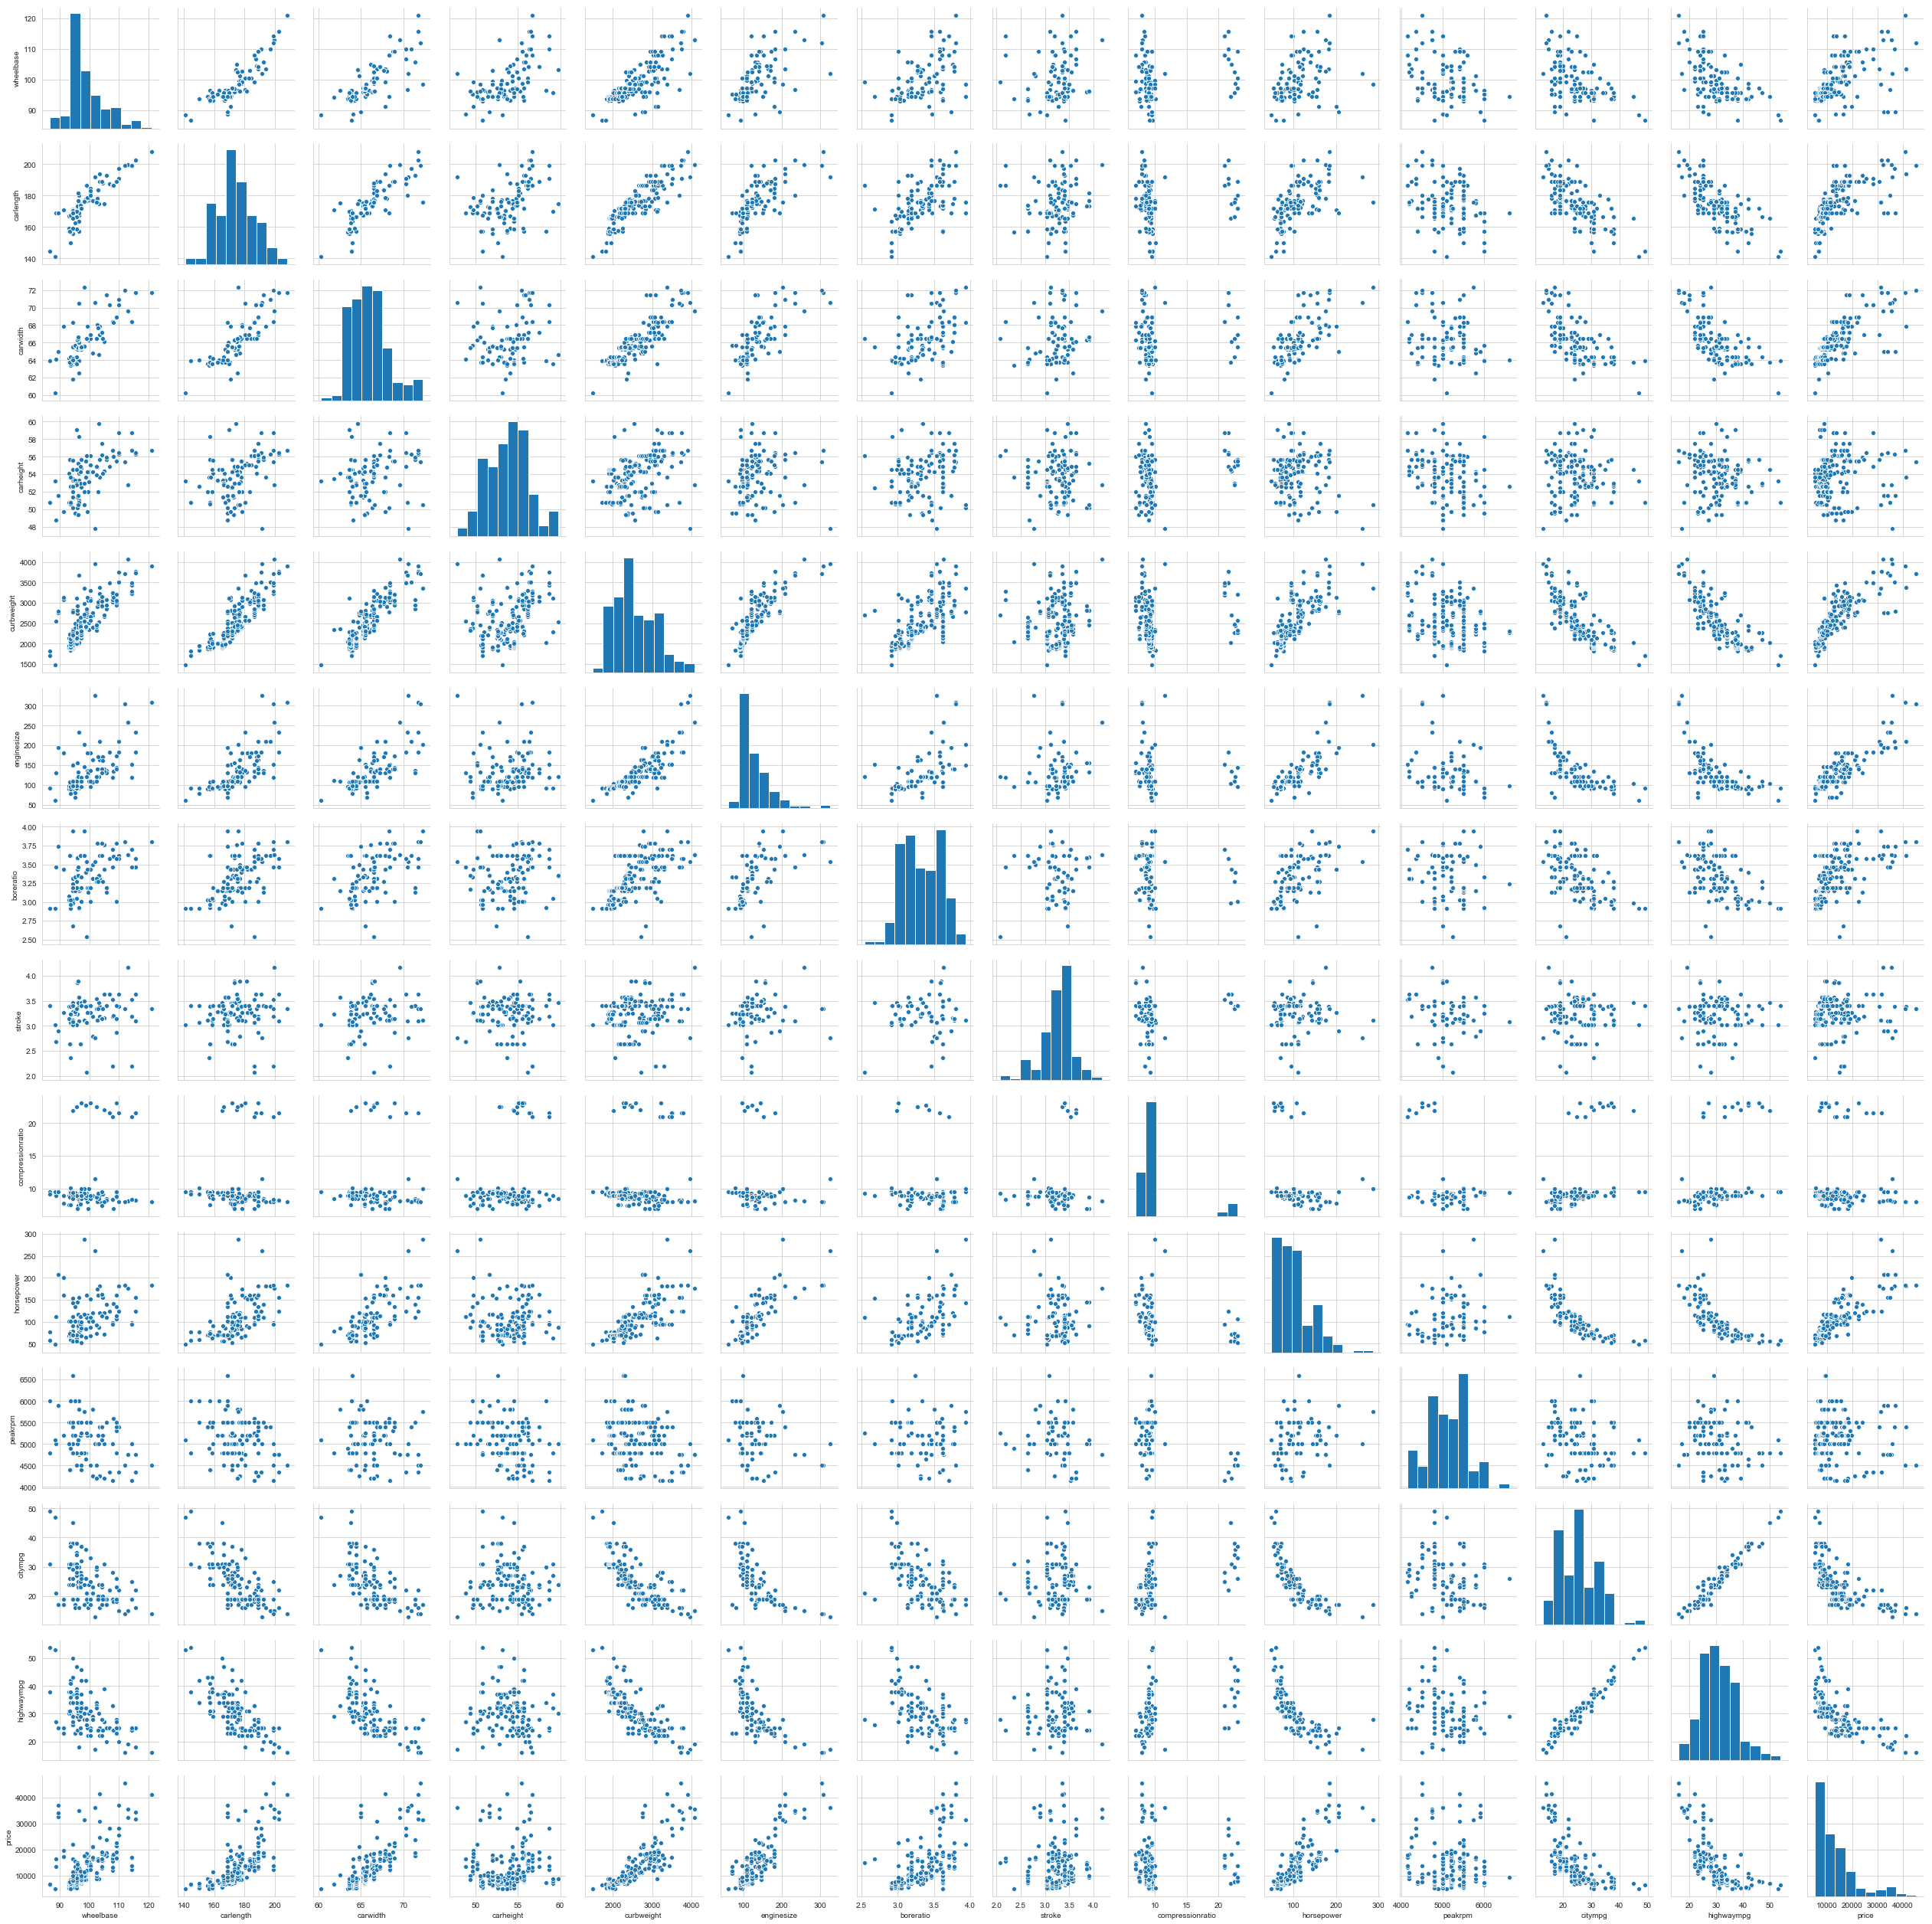

In [30]:
sns.pairplot(carprice)
plt.show()

We can notice there are linear patterns in the dataset.
Let's plot a correlation heatmap to analyse further.

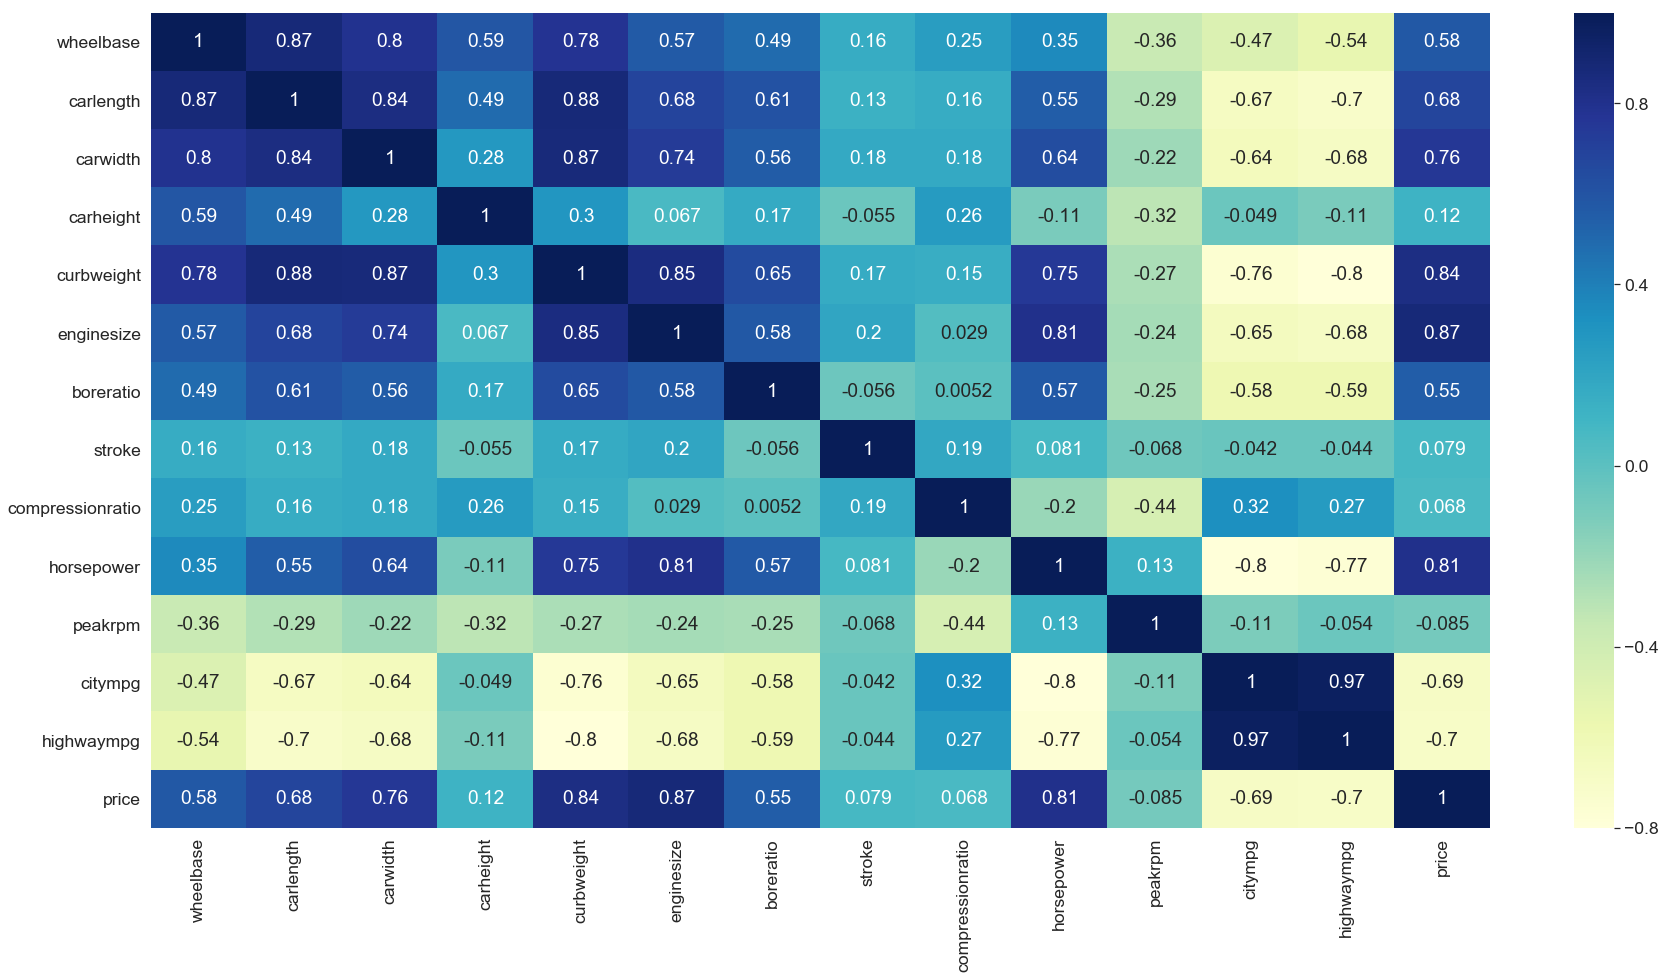

In [31]:
# Correlation heatmap
carprice.corr('spearman')
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(carprice.corr(),cmap="YlGnBu",annot=True) 

From the above results, we get a general sense of which features are related to price (both positive and negative).<Br>

Following variables are positively related (to Price):
* enginesize
* curbweight
* horsepower
* stroke
* carwidth
* carlength
* wheelbase
* boreratio

<br>
Following variables are negatively related (to Price):
*  citympg,
*  highwaympg.

We also notice some multicolinearity in the variables. Example:

* citympg and highwaympg
* curbweight and carlengh 
* curbweight and wheelbase
* curbweight and carwidth 


__We will be dealing with these later.__

<a id="3.2"></a>
### 3.2 Categorical Variables Analysis

Let's have a look at the categorical variables in the dataset.

In [32]:
cat_var = list(carprice.columns[carprice.dtypes == 'object'])
cat_var

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_name']

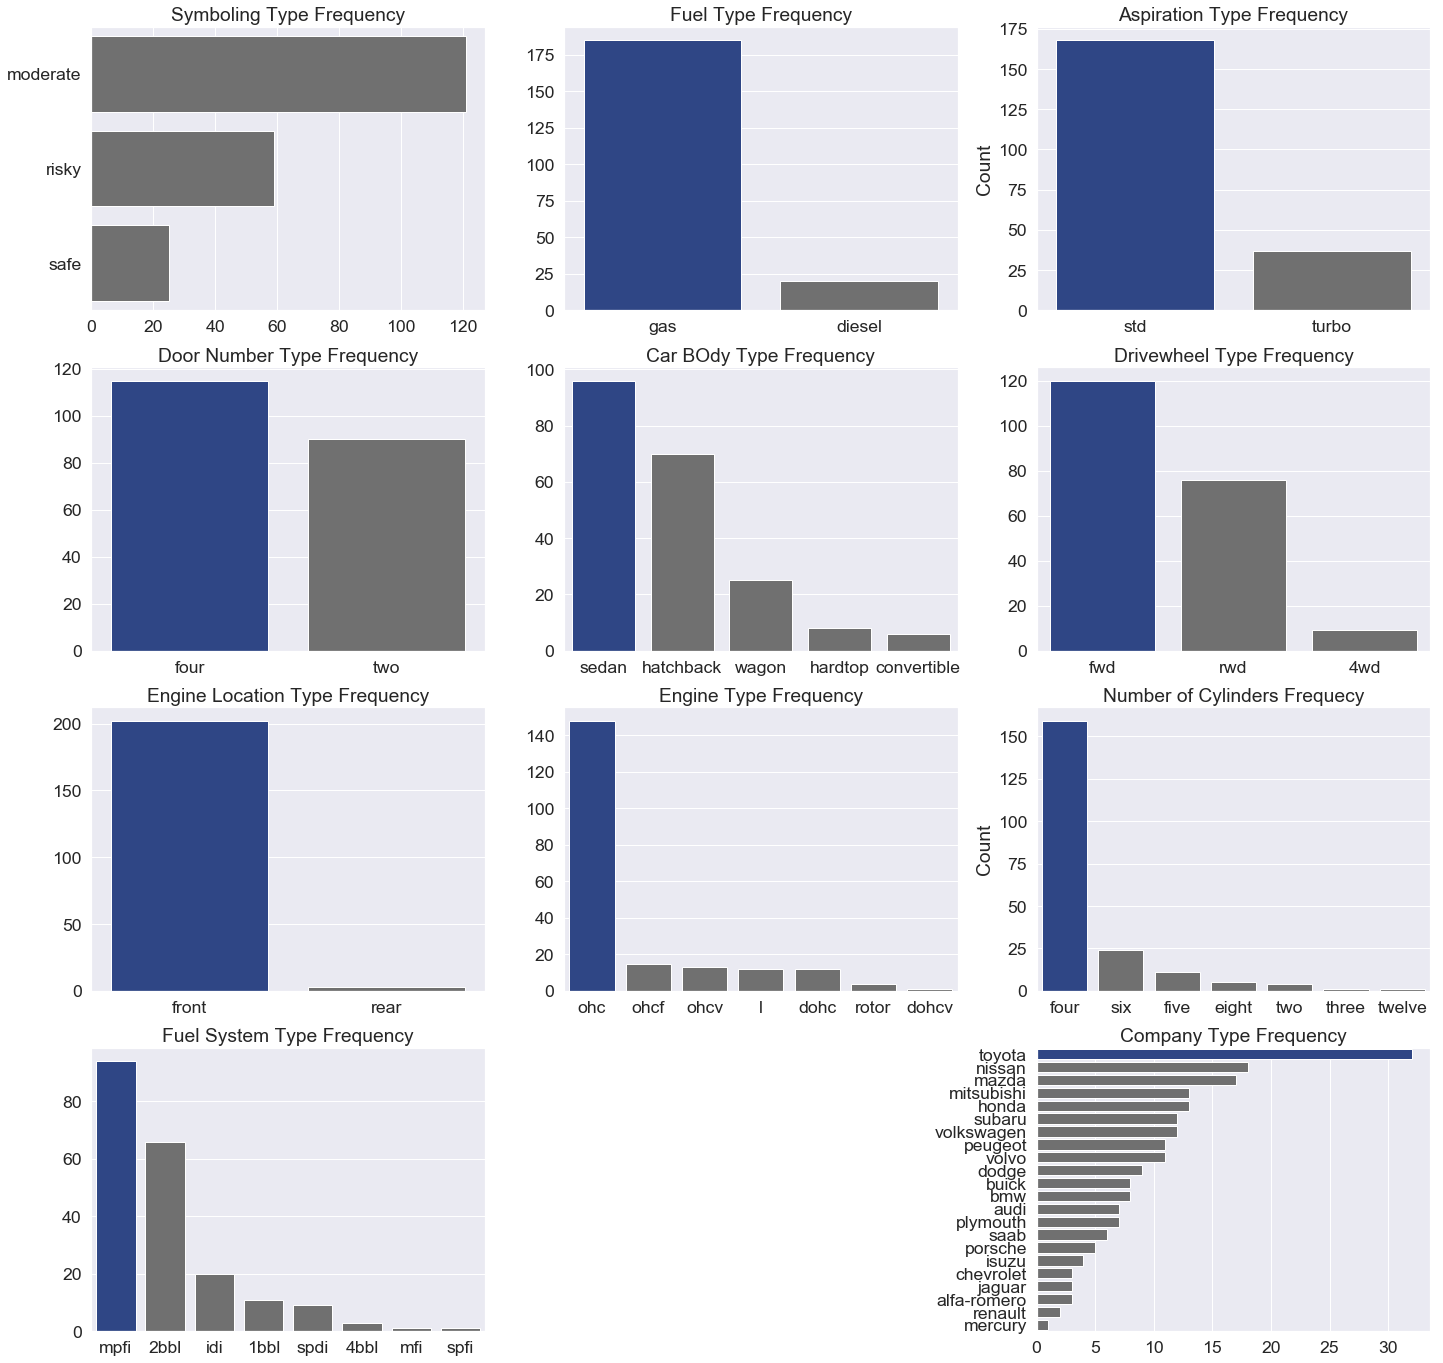

In [33]:
plt.figure(figsize=(24, 24))
plt.subplot(431)
clrs = ["#707070" if (x != 'moderately risky') else "#214093" for x in carprice['symboling'].value_counts().index ]
p = sns.countplot(data=carprice, y = 'symboling',palette=clrs,
                  order=carprice['symboling'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Symboling Type Frequency')
plt.subplot(432)
clrs = ["#707070" if (x != 'gas') else "#214093" for x in carprice['fueltype'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'fueltype',palette=clrs,
                  order=carprice['fueltype'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Fuel Type Frequency')
plt.subplot(433)
clrs = ["#707070" if (x != 'std') else "#214093" for x in carprice['aspiration'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'aspiration',palette=clrs,
                  order=carprice['aspiration'].sort_values().value_counts().index.tolist())
p.set(ylabel='Count', xlabel='',title='Aspiration Type Frequency')
plt.subplot(434)
clrs = ["#707070" if (x != 'four') else "#214093" for x in carprice['doornumber'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'doornumber',palette=clrs,
                  order=carprice['doornumber'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Door Number Type Frequency')
plt.subplot(435)
clrs = ["#707070" if (x != 'sedan') else "#214093" for x in carprice['carbody'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'carbody',palette=clrs,
                  order=carprice['carbody'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Car BOdy Type Frequency')
plt.subplot(436)
clrs = ["#707070" if (x != 'fwd') else "#214093" for x in carprice['drivewheel'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'drivewheel',palette=clrs,
                  order=carprice['drivewheel'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Drivewheel Type Frequency')
##############################################################################

plt.subplot(437)
clrs = ["#707070" if (x != 'front') else "#214093" for x in carprice['enginelocation'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'enginelocation',palette=clrs,
                  order=carprice['enginelocation'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Engine Location Type Frequency')

# Engine Type Frequecy
plt.subplot(438)
clrs = ["#707070" if (x != 'ohc') else "#214093" for x in carprice['enginetype'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'enginetype',palette=clrs,
                  order=carprice['enginetype'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Engine Type Frequency')

# cylindernumber
plt.subplot(439)
clrs = ["#707070" if (x != 'four') else "#214093" for x in carprice['cylindernumber'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'cylindernumber',palette=clrs,
                  order=carprice['cylindernumber'].sort_values().value_counts().index.tolist())
p.set(ylabel='Count', xlabel='',title='Number of Cylinders Frequecy')

#fuelsystem
plt.subplot(4,3,10)
clrs = ["#707070" if (x != 'mpfi') else "#214093" for x in carprice['fuelsystem'].value_counts().index ]
p = sns.countplot(data=carprice, x = 'fuelsystem',palette=clrs,
                  order=carprice['fuelsystem'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Fuel System Type Frequency')

# Company Name
plt.subplot(4,3,12)
clrs = ["#707070" if (x != 'toyota') else "#214093" for x in carprice['company_name'].value_counts().index ]
p = sns.countplot(data=carprice, y = 'company_name',palette=clrs,
                  order=carprice['company_name'].sort_values().value_counts().index.tolist())
p.set(ylabel='', xlabel='',title='Company Type Frequency')
plt.show()

From the above graphs, we note that certain categories are appearing more frequently than others. Hence, these features can be used by Geely automobiles to target the US market.
<br>
The most compelling features are:

*   **symboling:** moderately risky
*  **fueltype:** gas
*  **aspiration:** standard
*  **doornumbers:** four
*  **Carbody:** Sedan
*  **drivewheel:** forward
*  **engine location:** front
*  **engine type:** ohc
*  **cylinderNumber:** four
*  **fuelSystem**: mpfi
*  **Company**: Toyota












<a id="3.3"></a>
### 3.3 Removing Outliers

Outliers can have a dramatic impact on linear regression. It can change the model equation completely i.e. bad prediction or estimation. Hence, we shall remove the outliers from out dataset.

In [34]:
num_var= list(carprice.columns[carprice.dtypes != 'object'])
num_var

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Let's draw box plots for above data points to observe further.

In [35]:
# Define a function for plotting subplots
def box_sub_plot(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 20))
    for var in var_list:
        clrs = ["#707070" if (x != carprice.iloc[:,var_list.index(var)+1].value_counts().index[0]) 
                else "#214093" for x in carprice.iloc[:,var_list.index(var)+1].value_counts().index ]
        plt.subplot(4,4,var_list.index(var)+1)
        sns.boxplot(x = var, data = carprice,palette=clrs)
    plt.show()

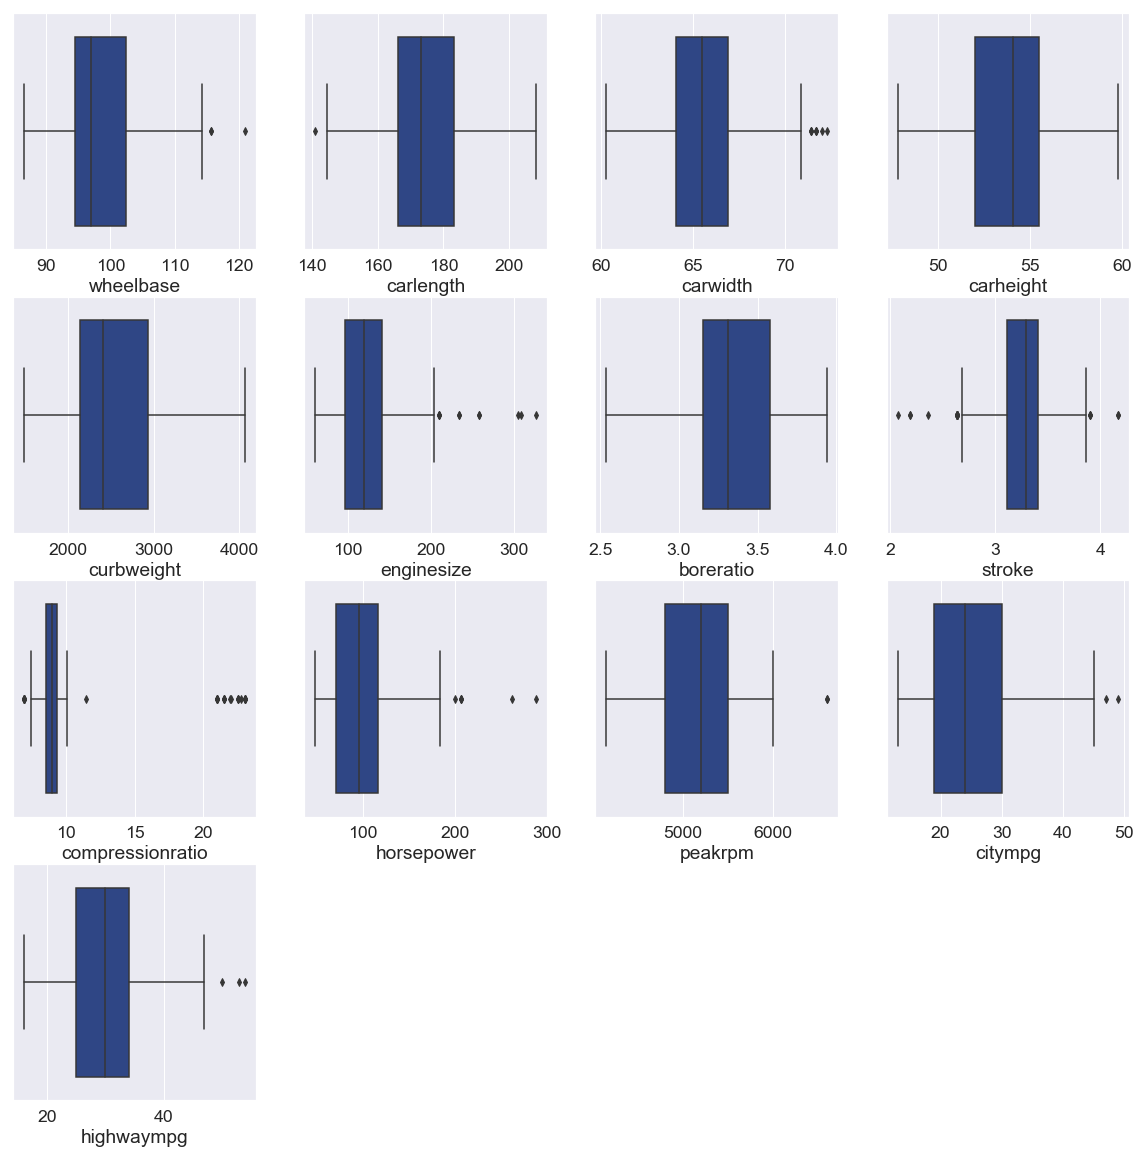

In [36]:
box_sub_plot(num_var[:-1])

We can notice that the below variables have most outliers:

* compressionratio
* horsepower
* enginesize

Let's remoce the outlier values from these columns. The best way of rmoving these is by removing any values that lies 1.5 times of IQR.

IQR = 75 Percetile - 25 Percentile
Then We will remove values which are 1.5 times of IQR.

In [37]:
carprice[num_var].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


 Since, our dataset has less records, removing outliers in a standard way, will reduce the data points.
<br>To analyse outliers, let's plot a dist plot and analyse further.

In [38]:
#Create a List for Outliers
out_var= ['compressionratio','horsepower','enginesize']
# get length of the list contaning NUmerical variables
nlen = len(out_var)

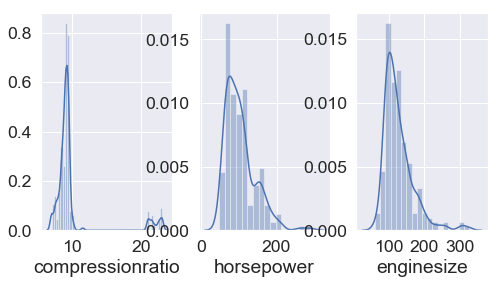

In [39]:
plt.figure(figsize=(8, 4))
plt.subplot(131)
sns.distplot(carprice['compressionratio'])
plt.subplot(132)
sns.distplot(carprice['horsepower'])
plt.subplot(133)
sns.distplot(carprice['enginesize'])

Now, from the aboce plots, we see that compression ratio has outliers lying in range of ~90% , so we will remove the upper limit.
However, for others, we will remove points between 0.01 - 0.96 %

In [40]:
print(carprice[['horsepower','enginesize']].quantile([0.01, .96]))
print(carprice[['compressionratio']].quantile([0.01, .90]))

      horsepower  enginesize
0.01       52.12       70.00
0.96      182.00      209.00
      compressionratio
0.01              7.00
0.90             10.94


In [41]:
# Outilers in price of cars
carprice['horsepower'][np.abs(carprice['horsepower'] > 182.00)]= 182.00
carprice['enginesize'][np.abs(carprice['enginesize'] > 209.00)]= 209.00
carprice['compressionratio'][np.abs(carprice['compressionratio'] > 10.94)]= 10.94

Finally, let's remoce the rows where price of cars is greater than 3 Standard Devitionn.
Since too-high or too-low, we wont be considering them in our model.

In [42]:
# Remoce values not in 3SD
carprice= carprice[np.abs(carprice.price-carprice.price.mean()) <= (3*carprice.price.std())]

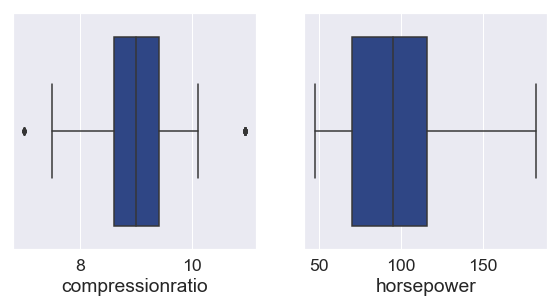

In [43]:
box_sub_plot(out_var[:-1])

>**Note:** As a standard rule, we have removed values which are 1.5 times of the IQR. We can still see a few values, but we will go ahead with these.

After plotting again, we notice that the outliers have been removed.

<a id="3.4"></a>
### 3.4 Dealing with Multicolinearity

We noticed that the variables - __carlength__, __carwidth__, __carweight__, __carheight__, __citympg__ and __highwaympg__ are highly corelated.
Let's create some new variables to address the issue.

In [44]:
#Length-Width Ratio
carprice['carlenwid'] = carprice['carlength']/carprice['carwidth']
# Width-Height Ratio
carprice['carwidhgt'] = carprice['carwidth']/carprice['carwidth']
# HorsePower-Curbweight
carprice['carhorcurb'] = carprice['horsepower']/carprice['curbweight']
#highwaympg- Citympg
carprice['carhmpgcmpg'] = carprice['highwaympg']/carprice['citympg']
## droping the orignal variables
carprice.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [45]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,company_name,carlenwid,carwidhgt,carhorcurb,carhmpgcmpg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,risky,gas,std,two,convertible,rwd,front,88.60,2548,dohc,...,2.68,9.00,111,5000,"13,495.00",alfa-romero,2.63,1.00,0.04,1.29
2,risky,gas,std,two,convertible,rwd,front,88.60,2548,dohc,...,2.68,9.00,111,5000,"16,500.00",alfa-romero,2.63,1.00,0.04,1.29


<a id="4"></a>
## 4. Data Prepration for Linear Regression

We now have a clean dataset with outliers removed and we have ideantified major variables.
Now, Let's prepare our categorical variables so that they can be used in the linear regression model

<a id="4.1"></a>
### 4.1 Dealing with Binary Variables

The Binary variables are those which contain only two values. Let's convert them to 0/1 format.

The binary variables are:


In [46]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,company_name,carlenwid,carwidhgt,carhorcurb,carhmpgcmpg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,risky,gas,std,two,convertible,rwd,front,88.60,2548,dohc,...,2.68,9.00,111,5000,"13,495.00",alfa-romero,2.63,1.00,0.04,1.29
2,risky,gas,std,two,convertible,rwd,front,88.60,2548,dohc,...,2.68,9.00,111,5000,"16,500.00",alfa-romero,2.63,1.00,0.04,1.29


In [47]:
print(carprice.columns)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'company_name',
       'carlenwid', 'carwidhgt', 'carhorcurb', 'carhmpgcmpg'],
      dtype='object')


In [48]:
carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0}) # Dielsel is Base Value
carprice['aspiration'] = carprice['aspiration'].map({'std': 1, 'turbo': 0}) # Turbo us Base Value
carprice['doornumber'] = carprice['doornumber'].map({'two': 1, 'four': 0}) # Four is Base Value
carprice['enginelocation'] = carprice['enginelocation'].map({'front': 1, 'rear': 0}) # Rear is Base Value
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,company_name,carlenwid,carwidhgt,carhorcurb,carhmpgcmpg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,...,2.68,9.00,111,5000,"13,495.00",alfa-romero,2.63,1.00,0.04,1.29
2,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,...,2.68,9.00,111,5000,"16,500.00",alfa-romero,2.63,1.00,0.04,1.29


<a id="4.2"></a>
### 4.2 Creating Dummy Variables

__Before__ we create a dummy variables, we notice that `company_name` has a lot of values. We can group these values into tiers, based on mean price of the cars they produce.

*  __lowtier__ if company mean price is below 10,000
*  __midtier__ if company mean price is above 10,000 and below 20,000
*  __hightier__ if company mean price is above 20,000

This column will be more useful for analysis

In [49]:
# Create Groupby object
carmean= carprice.groupby('company_name').price.mean().sort_values(ascending=False)
#Merge into Original Df
carprice= pd.merge(carprice, carmean, on='company_name', how='inner')
#Create an empty column - Car_tier
carprice['car_tier'] = np.nan
#Initise list
lst = [carprice]

In [50]:
# Fill values in new Column
for carprice in lst:
    carprice.loc[carprice['price_y'] <= 10000, 'car_tier'] = 'lowtier'
    carprice.loc[(carprice['price_y'] > 10000) & (carprice['price_y'] <=20000), 'car_tier'] = 'mediumtier'
    carprice.loc[carprice['price_y'] > 20000, 'car_tier'] = 'hightier'

In [51]:
# Remove unwanted columns
carprice.drop(['company_name'], axis=1,inplace=True)
carprice.drop(['price_y'], axis=1,inplace=True)
# Rename Price_x to Price
carprice.rename(columns={'price_x':'price'},inplace=True)

In [52]:
carprice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carlenwid,carwidhgt,carhorcurb,carhmpgcmpg,car_tier
0,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,...,2.68,9.00,111,5000,"13,495.00",2.63,1.00,0.04,1.29,mediumtier
1,risky,1,1,1,convertible,rwd,1,88.60,2548,dohc,...,2.68,9.00,111,5000,"16,500.00",2.63,1.00,0.04,1.29,mediumtier


In [53]:
# Creating dummy variables
df = pd.get_dummies(carprice)

In [54]:
#We have 1 extra column here, so in every dummy variable, we can remove 1 column
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'car_tier_lowtier'],axis=1,inplace=True)

In [55]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carlenwid', 'carwidhgt',
       'carhorcurb', 'carhmpgcmpg', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_tier_hightier', 'car_tier_mediumtier'],
      dtype='object')

In [56]:
df.shape

(202, 46)

In [57]:

df.head(2)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_tier_hightier,car_tier_mediumtier
0,1,1,1,1,88.60,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.60,2548,130,3.47,2.68,9.00,...,0,0,0,0,0,1,0,0,0,1


<a id="4.3"></a>
### 4.3 Splitting into Test and Train Dataset

In [58]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
print(df_train.shape)
print(df_test.shape)

(141, 46)
(61, 46)


In [60]:
#Let's split the dataset in test and train set of ratio 70-30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
print(df_train.shape)
print(df_test.shape)

(141, 46)
(61, 46)


<a id="4.4"></a>
### 4.4 Feature Scaling of Data

Let's Scale the dataset to Normalise the values. This helps in processing the data.

In [62]:
scaler = MinMaxScaler()

In [63]:
# We will now apply this scaler to all varisbales except binary and dummy
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'carlenwid', 'carwidhgt',
            'carhorcurb', 'carhmpgcmpg', 'boreratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_tier_hightier,car_tier_mediumtier
1,1,1,1,1,0.07,0.41,0.47,0.66,0.29,0.51,...,0,0,0,0,0,1,0,0,0,1
162,1,1,1,1,0.27,0.30,0.25,0.50,0.48,0.61,...,0,0,0,0,0,1,0,0,0,0
194,1,1,0,1,0.61,0.60,0.54,0.89,0.51,0.63,...,0,0,0,0,0,1,0,0,0,1
166,1,1,1,1,0.41,0.41,0.57,0.77,0.68,0.58,...,0,0,0,0,0,1,0,0,0,0
187,1,1,1,1,0.27,0.28,0.32,0.46,0.63,0.38,...,0,0,0,0,0,1,0,0,0,1


In [64]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_tier_hightier,car_tier_mediumtier
count,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,...,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00
mean,0.89,0.79,0.44,0.99,0.41,0.41,0.42,0.56,0.55,0.54,...,0.03,0.33,0.02,0.11,0.00,0.43,0.04,0.01,0.11,0.47
std,0.32,0.41,0.50,0.12,0.20,0.20,0.23,0.19,0.15,0.23,...,0.17,0.47,0.14,0.32,0.00,0.50,0.20,0.08,0.31,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.00,0.27,0.25,0.24,0.42,0.49,0.41,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,0.36,0.36,0.34,0.55,0.57,0.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,0.50,0.55,0.54,0.74,0.63,0.61,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


<a id="4.5"></a>
### 4.5 Divide into X and Y Sets for Building Model

In [65]:
y_train = df_train.pop('price')
X_train = df_train

<a id="5"></a>
## 5. Building the Linear Regression Model

In [66]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 9),
 ('aspiration', False, 7),
 ('doornumber', False, 15),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 27),
 ('enginesize', False, 5),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carlenwid', True, 1),
 ('carwidhgt', False, 30),
 ('carhorcurb', True, 1),
 ('carhmpgcmpg', False, 26),
 ('symboling_moderate', False, 28),
 ('symboling_safe', False, 20),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 23),
 ('carbody_sedan', False, 24),
 ('carbody_wagon', False, 11),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 17),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', False, 13),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', False, 6),
 ('cylindernumber_eight', False, 18),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylinde

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'carlenwid', 'carhorcurb', 'carbody_convertible',
       'enginetype_dohc', 'enginetype_ohc', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'car_tier_hightier'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'compressionratio', 'carwidhgt', 'carhmpgcmpg', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_tier_mediumtier'],
      dtype='object')

<a id="5.1"></a>
### 5.1 Building model using statsmodel, for the detailed statistics

In [70]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [71]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [73]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.01e-74
Time:                        19:21:54   Log-Likelihood:                 222.17
No. Observations:                 141   AIC:                            -412.3
Df Residuals:                     125   BIC:                            -365.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5865    

> **Observarion:** `boreratio`  has p-Value > 0.05, making it insignificant. So Let's drop it

In [74]:
X_train1 = X_train_rfe.drop('boreratio', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     177.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           9.76e-76
Time:                        19:21:54   Log-Likelihood:                 221.86
No. Observations:                 141   AIC:                            -413.7
Df Residuals:                     126   BIC:                            -369.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5752    

> **Observarion:** `enginetype_dohc`  has p-Value > 0.05, making it insignificant. So Let's drop enginesize

In [75]:
X_train2 = X_train1.drop('enginetype_dohc', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train2)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.36e-76
Time:                        19:21:54   Log-Likelihood:                 221.10
No. Observations:                 141   AIC:                            -414.2
Df Residuals:                     127   BIC:                            -372.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5408    

>**Observation:** `cylindernumber_five` has p_value of enginetype_rotor is greater than 0.05, making it insignificant.
Let's remove it also.

In [76]:
X_train3 = X_train2.drop('cylindernumber_five', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train3)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.46e-77
Time:                        19:21:54   Log-Likelihood:                 219.64
No. Observations:                 141   AIC:                            -413.3
Df Residuals:                     128   BIC:                            -374.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5019    

>**Observation:** `cylindernumber_six` has a p-value > 0.05 making it insignificant. Let's remove it

In [77]:
X_train4 = X_train3.drop('cylindernumber_six', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train4)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     219.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.84e-78
Time:                        19:21:54   Log-Likelihood:                 218.42
No. Observations:                 141   AIC:                            -412.8
Df Residuals:                     129   BIC:                            -377.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4833    

> We now notice that p-values are significant now. Let's observe the VIF values

Let's now defice a finction to get the VIF values

In [78]:
def getVIF(X_train):
    vif = pd.DataFrame() # Empty DataFrame
    X = X_train # Assign the Train Dataset
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [79]:
getVIF(X_train4)

,Features,VIF
0,const,193.02
4,horsepower,15.90
7,carhorcurb,11.93
2,wheelbase,4.24
6,carlenwid,2.71
10,cylindernumber_four,2.24
11,car_tier_hightier,2.21
9,enginetype_ohc,1.87
5,peakrpm,1.70
1,enginelocation,1.53


Let's analyse the correlation between the values.

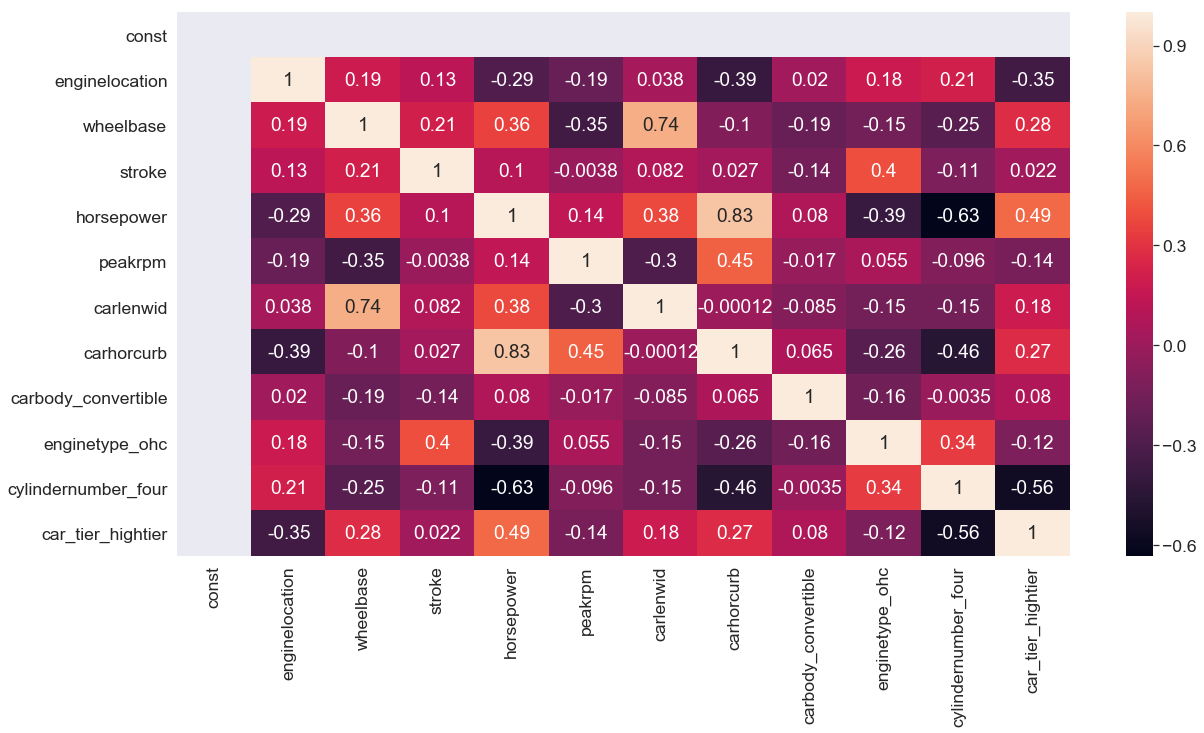

In [80]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

> Observation: We notice that `Horsepower` has the highest VIF and it has a very high colinearity with `carhorcurb`.
__LEt's remove horsepwer first and see.__

In [81]:
X_train5 = X_train4.drop('horsepower', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train5)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.07e-57
Time:                        19:21:56   Log-Likelihood:                 164.70
No. Observations:                 141   AIC:                            -307.4
Df Residuals:                     130   BIC:                            -275.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2286    

>**Observation:** We notice that the Adj-R2 value drops significantly.
Since `carhorcurb` has high multicolinearity, et;s drop that either.

In [82]:
X_train5 = X_train4.drop('carhorcurb', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train5)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           9.12e-68
Time:                        19:21:56   Log-Likelihood:                 190.01
No. Observations:                 141   AIC:                            -358.0
Df Residuals:                     130   BIC:                            -325.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2679    

Before we analyse the above, let's see the VIF values

In [83]:
getVIF(X_train5)

,Features,VIF
0,const,157.61
2,wheelbase,3.19
4,horsepower,2.58
6,carlenwid,2.58
9,cylindernumber_four,2.19
10,car_tier_hightier,2.10
8,enginetype_ohc,1.83
1,enginelocation,1.50
3,stroke,1.49
5,peakrpm,1.45


>**Observation:** We notice that there asnt been much impact on Adjusted R2 now. Also, the VIF values have reduced.
Now, further let's remove `peakrpm` from out model and have a look

In [84]:
X_train6 = X_train5.drop('peakrpm', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train6)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.83e-69
Time:                        19:21:56   Log-Likelihood:                 189.98
No. Observations:                 141   AIC:                            -360.0
Df Residuals:                     131   BIC:                            -330.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2740    

In [85]:
getVIF(X_train6)

,Features,VIF
0,const,135.67
2,wheelbase,3.12
5,carlenwid,2.51
4,horsepower,2.30
8,cylindernumber_four,2.16
9,car_tier_hightier,1.93
7,enginetype_ohc,1.76
3,stroke,1.48
1,enginelocation,1.47
6,carbody_convertible,1.18


>**Observation:** We notice that removing engine has:
* Not impacted the R2 much
* Reduced VIF
Now's we notice - `stroke` has p-value slightly highrt. Let's remove this

In [86]:
X_train7 = X_train6.drop('stroke', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train7)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.21e-69
Time:                        19:21:56   Log-Likelihood:                 188.95
No. Observations:                 141   AIC:                            -359.9
Df Residuals:                     132   BIC:                            -333.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2490    

In [87]:
getVIF(X_train7)

,Features,VIF
0,const,124.89
2,wheelbase,2.95
4,carlenwid,2.46
3,horsepower,2.23
7,cylindernumber_four,2.09
8,car_tier_hightier,1.87
1,enginelocation,1.47
6,enginetype_ohc,1.30
5,carbody_convertible,1.18


>**Observation:** Although less, but `enginetype_ohc` VIF is still high. Let's remove and assess the model,

In [88]:
X_train8 = X_train7.drop('enginetype_ohc', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train8)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.49e-71
Time:                        19:21:56   Log-Likelihood:                 188.85
No. Observations:                 141   AIC:                            -361.7
Df Residuals:                     133   BIC:                            -338.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2492    

In [89]:
getVIF(X_train8)

,Features,VIF
0,const,124.89
2,wheelbase,2.91
4,carlenwid,2.46
3,horsepower,2.15
6,cylindernumber_four,2.01
7,car_tier_hightier,1.77
1,enginelocation,1.43
5,carbody_convertible,1.13


>**Observation:** carlenwid has high p-va;ue. Let's remove it

In [90]:
X_train9 = X_train8.drop('carlenwid', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train9)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     266.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.04e-72
Time:                        19:21:56   Log-Likelihood:                 188.65
No. Observations:                 141   AIC:                            -363.3
Df Residuals:                     134   BIC:                            -342.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2388    

In [91]:
getVIF(X_train9)

,Features,VIF
0,const,115.69
3,horsepower,2.05
5,cylindernumber_four,1.96
6,car_tier_hightier,1.75
2,wheelbase,1.49
1,enginelocation,1.40
4,carbody_convertible,1.12


Finally, we notice that p-values and VIF values are good. But, we can still remove `enginelocation` as it has a high negative correlarion.

In [92]:
X_train10 = X_train9.drop('enginelocation', axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train10)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           9.11e-69
Time:                        19:21:56   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0133    

In [93]:
getVIF(X_train10)

,Features,VIF
0,const,19.89
4,cylindernumber_four,1.95
2,horsepower,1.89
5,car_tier_hightier,1.56
1,wheelbase,1.24
3,carbody_convertible,1.08


>**Observation:** We now see the below:
* All variables have ap-value < 0.05 making them significant.
* VIF is <5 for all variables.
* Adjusted R2 is __0.907__ which is very high value. Although initially we had ~83% but this model looks good.

Hence we can conclude this as our final model.

<a id="5.2"></a>
### 5.2 Resiual analysis on train dataset

In [94]:
y_train_price = lm.predict(X_train10)

Text(0.5, 0, 'Errors')

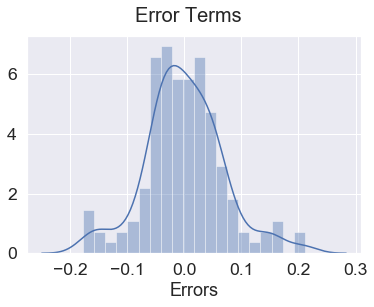

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

>**Observation:** We notice that error terms follow a normal distribution. lthough it's not a perfect one as there is skewness.

<a id="5.3"></a>
### 5.3 Making Predictions

#### Applying the scaling on the test sets

We will be using only those variables which we used in our final model

In [96]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'carlenwid', 'carwidhgt',
            'carhorcurb', 'carhmpgcmpg', 'boreratio','stroke','compressionratio','peakrpm','price']

In [97]:
df_test[num_vars] =  scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_tier_hightier,car_tier_mediumtier
140,1,1,0,1,0.37,0.33,0.32,0.77,0.27,0.51,...,0,0,0,0,0,1,0,0,0,0
101,1,1,1,1,0.16,0.61,0.81,0.64,0.57,0.51,...,0,0,0,0,0,1,0,0,0,1
31,1,1,1,1,0.24,0.14,0.12,0.26,0.48,0.79,...,0,0,0,0,0,0,0,0,0,0
88,1,1,1,1,0.27,0.17,0.24,0.44,0.58,0.61,...,0,1,0,0,0,0,0,0,0,1
183,1,1,0,1,0.37,0.31,0.32,0.46,0.63,0.51,...,0,0,0,0,0,1,0,0,0,1


#### Dividing into X_test and y_test

In [98]:
y_test = df_test.pop('price')
X_test = df_test

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions
y_pred = lm.predict(X_test_new)

<a id="5.4"></a>
### 5.4 Model Evaluation

Text(0, 0.5, 'y_pred')

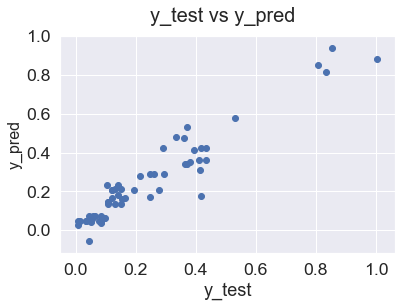

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

>**Observation:** __y_test__ vs __y_pred__ is observed to be __almost linear__ with some variataion occuring. Overall, it is a pretty linear spread.

<a id="5.4.1"></a>
#### 5.4.1 R2_Score

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9056388935908384

In [103]:
print("The R2_Score of the Model is:",r2_score(y_test, y_pred))

The R2_Score of the Model is: 0.9056388935908384


<a id="6"></a>
##  6. Inferences

We can infer the follwong points:

* Final R2_score of __0.906__ explains that the model is able to explain the 90% of the variance.
* The Adj-R2 of the final model is: __0.907__
* The p-Vlues of the coefficients are well below 0.05, making them significant.
* The VIF is well under control.
* The final feaures are:
    * cylindernumber_four
    * horsepower
    * car_tier_hightier
    * wheelbase
    * carbody_convertible

The equation of our best fitted line is:

**$ price = -0.0133 + 0.3058  \times  wheelbase + 0.3750 \times horsepower + 0.1785 \times carbody\_convertible - 0.0686 \times cylindernumber\_four + 0.3129 \times car\_tier\_hightier $**

__The above equation tells us how price varies with various factors.__ <br>
For example: While keeping all variables same, if we increase the horsepower of the car by 1 unit, the price increases by 0.37$.



#### Final Suggestions:

__Geely Automotives__ should consider the below points before entering US Market:

*  **Carbody:** Sedan
*  **fueltype:** gas
*  **aspiration:** standard
*  **doornumbers:** four
*  **carbodytype** sedan
*  **drivewheel:** forward
*  **engine location:** front
*  **engine type:** ohc
*  **cylinderNumber:** four
*  **fuelSystem**: mpfi

The above features can be udes to alter the specifications of their car and reach out to most US customers.